In [1]:
import numpy as np , matplotlib.pyplot as plt , cv2

## y = ax + b 
## y - ax = b   #deux equations de droites
## y/b   - x*a/b = 1


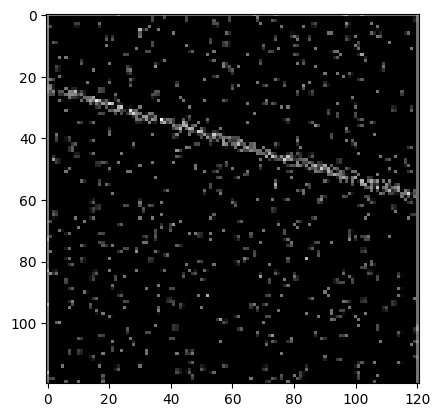

In [2]:
image0 = cv2.imread('image.ppm')
plt.imshow(image0)

## l'espace de houtg

### on va ecrire rho = xcos(the) + ysin(the)
### pho est la distance avec la droite
### l'angle entre abscisse et la perpendiculaire de la droite
### nouveau plan (0,theta,rho)

### TEST

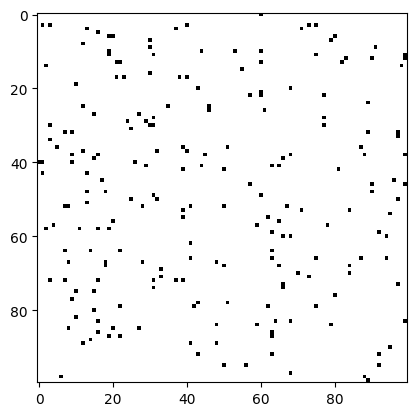

In [3]:
imagetruc = (np.random.rand(100, 100) < 0.02).astype(int)   #0.02% dêtre blanc
plt.imshow(imagetruc,cmap = 'binary')

In [4]:
theta  = np.arange(0,100)*(np.pi/180)
### faut calculer le rho max qui est la longeur de la dIagonale
rhomaxnonentier = np.sqrt(100**2  + 100**2 )
rhomaxnonentier

np.float64(141.4213562373095)

In [5]:
rhomaxentier = int(np.ceil(rhomaxnonentier))   #partie entiere sup
rhomaxentier

142

In [6]:
rhovec = np.linspace(-rhomaxentier,rhomaxentier,2*rhomaxentier)

### Go matrice accumulatice

In [7]:
matrice = np.zeros((2*rhomaxentier,len(theta)))
matrice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(284, 100))

In [8]:
indicesX, indicesY = [], []
for i in range(len(imagetruc)):           
    for j in range(len(imagetruc[0])):     
        if imagetruc[i][j] != 0:            
            indicesX.append(j)           
            indicesY.append(i)          

indicesX = np.array(indicesX)
indicesY = np.array(indicesY)

In [9]:
indicesX

array([60,  1,  3, 40, 73, 75, 13, 37, 71, 16, 19, 20, 80, 30, 79, 12, 30,
       91, 19, 44, 53, 60, 19, 31, 75, 99, 83, 90, 99, 21, 22, 60, 82,  2,
       98, 55, 30, 21, 23, 38, 40, 10, 43, 68, 60, 57, 60, 77, 89, 12, 35,
       46, 46, 61, 15, 27, 31, 77, 24, 29,  3, 30, 31, 77, 25,  7,  9, 89,
       97, 97,  3,  5, 39, 51, 87, 12, 32, 40,  9, 16, 45, 68, 88, 99, 15,
       66,  0,  1,  9, 26, 29, 44, 63, 65, 39, 50, 81,  1, 13, 17, 96, 57,
       90, 99, 13, 18, 90, 31, 60, 25, 32, 97, 13,  7,  8, 28, 41, 50, 67,
       39, 71, 84, 95, 39, 62, 20, 65,  4, 59, 78,  2, 11, 16, 19, 63, 92,
       66, 68, 94, 41,  7, 14, 22, 63, 41, 63, 75, 87, 94,  8, 18, 28, 48,
       18, 50, 65, 84, 33, 70, 84, 33, 73,  3,  7, 16, 31, 37, 39, 66, 97,
       31, 66, 10, 15, 80,  9, 43, 51, 22, 42, 62, 75, 15, 10, 16, 64, 68,
       99, 48, 59, 79,  8, 20, 27, 16, 63, 19, 22, 63, 14, 12, 41, 48, 95,
       43, 63, 92, 50, 56, 92, 68,  6, 88, 89])

### go accumuler

In [10]:
for i in range(len(indicesX)):
    x, y = indicesX[i], indicesY[i]
    for j in range(len(theta)):
        rho = int(round(x * np.cos(theta[j]) + y * np.sin(theta[j]))) + rhomaxentier
        if 0 <= rho < 2 * rhomaxentier:  
            matrice[rho, j] += 1 #ca accumulle


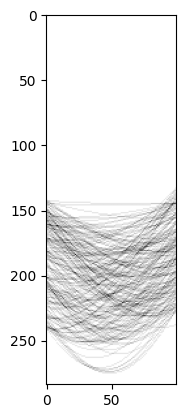

In [11]:
plt.imshow(matrice,cmap = 'binary')

In [12]:
np.max(matrice)

np.float64(10.0)

### Ya trop de trucs , on va donc faire varier le seuil et forie ce que ca donne 

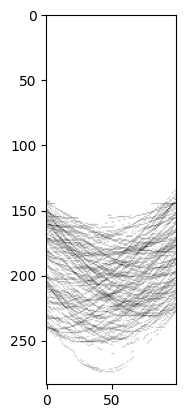

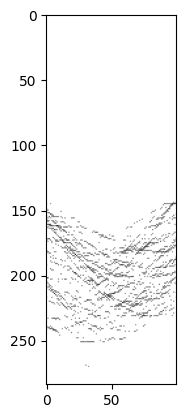

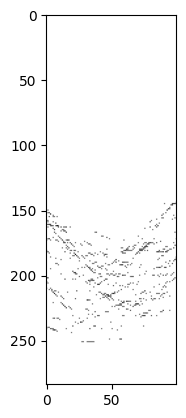

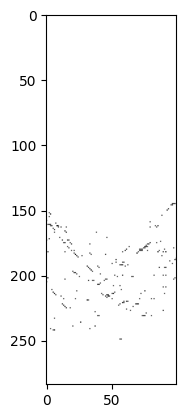

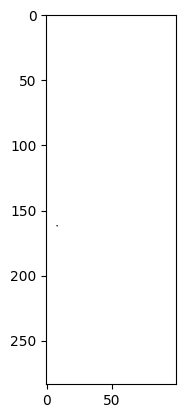

In [13]:
seuils = [2,4,5,6,10]
for seuil in seuils: 
    matricetest = matrice.copy()
    for i in range(matricetest.shape[0]):
        for j in range(matricetest.shape[1]):
            if matricetest[i, j] < seuil:
                matricetest[i, j] = 0  
    
    plt.imshow(matricetest, cmap='binary')
    plt.show()


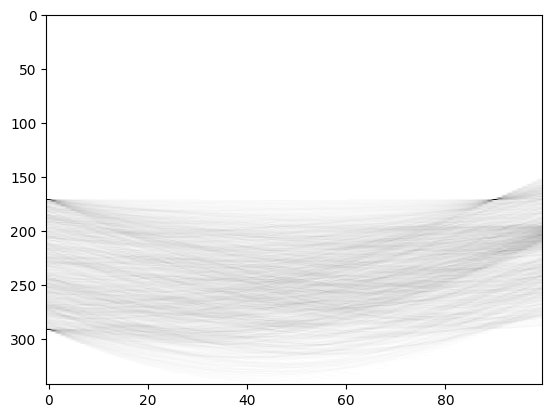

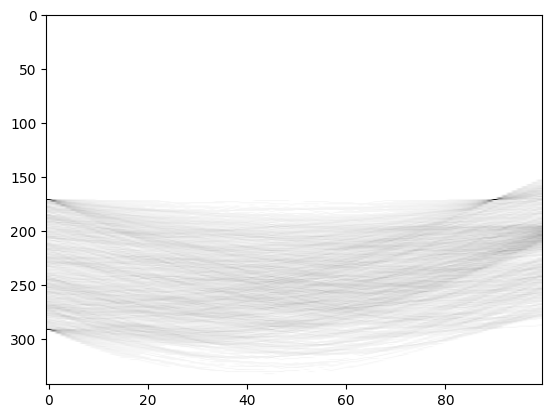

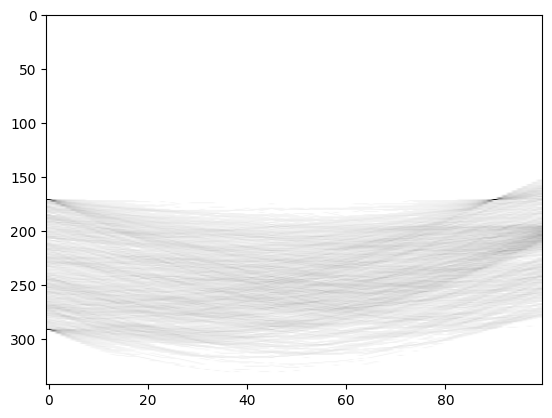

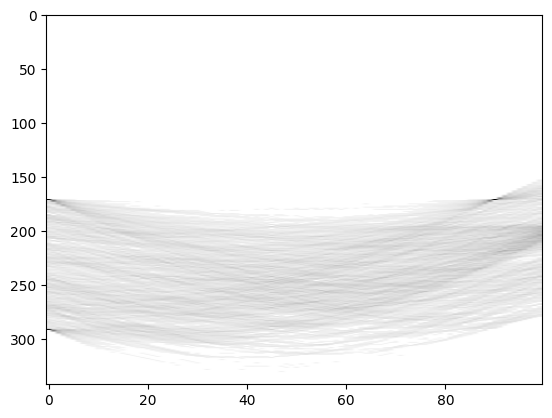

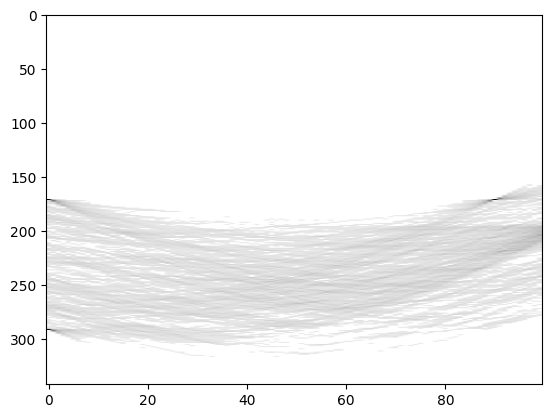

In [14]:
imagetruc = np.array(image0)

# rgb vers gris
if imagetruc.ndim == 3 and imagetruc.shape[2] == 3:
    imagetruc = np.mean(imagetruc, axis=2)

theta = np.arange(0, 100) * (np.pi / 180)
rhomaxnonentier = np.sqrt(imagetruc.shape[0]**2 + imagetruc.shape[1]**2)
rhomaxentier = int(np.ceil(rhomaxnonentier))
matrice = np.zeros((2 * rhomaxentier, len(theta)))

indicesX, indicesY = [], []
for i in range(imagetruc.shape[0]):           
    for j in range(imagetruc.shape[1]):     
        if imagetruc[i, j] != 0:         
            indicesX.append(j)           
            indicesY.append(i)

indicesX = np.array(indicesX)
indicesY = np.array(indicesY)

for i in range(len(indicesX)):
    x, y = indicesX[i], indicesY[i]
    for j in range(len(theta)):
        rho = int(round(x * np.cos(theta[j]) + y * np.sin(theta[j]))) + rhomaxentier
        if 0 <= rho < 2 * rhomaxentier:  
            matrice[rho, j] += 1

seuils = [2, 4, 5, 6, 10]
for seuil in seuils: 
    matricetest = matrice.copy()
    for i in range(matricetest.shape[0]):
        for j in range(matricetest.shape[1]):
            if matricetest[i, j] < seuil:
                matricetest[i, j] = 0
    
    plt.imshow(matricetest, cmap='binary', aspect='auto')
    plt.show()


### $y = (pho - xcos(thet)/sin(thet)$

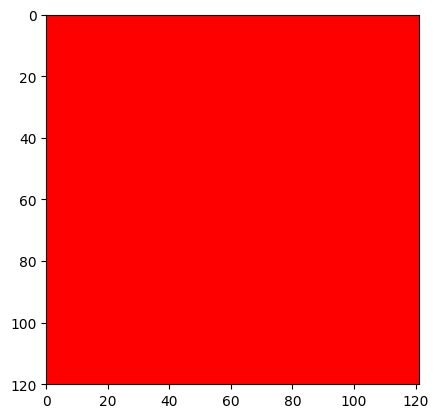

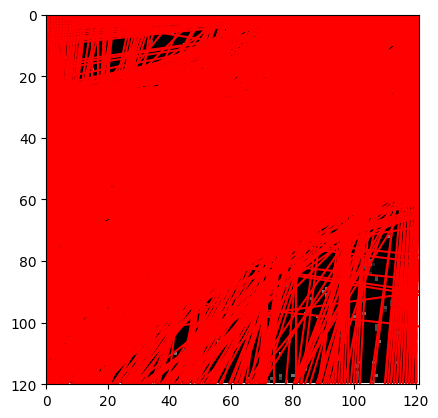

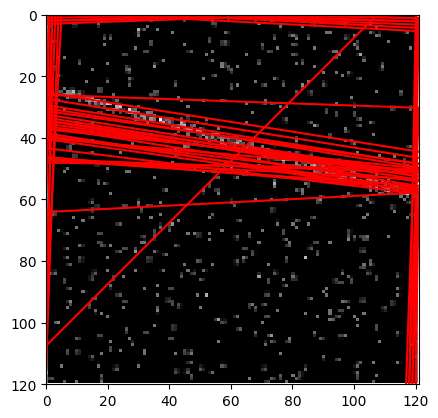

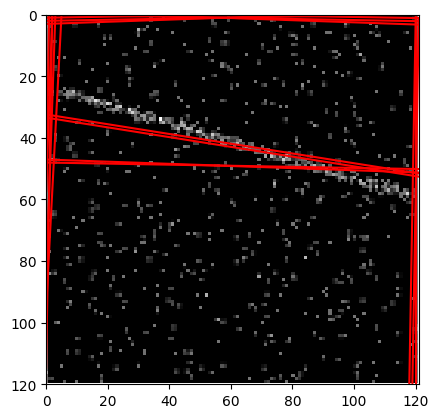

In [15]:
seuils = [10,20,30,35]
for seuil in seuils : 

    droites = []
    for i in range(matricetest.shape[0]):  # i = rho
        for j in range(matricetest.shape[1]):  # j = theta
            if matricetest[i, j] >= seuil:
                rhoreel = i - rhomaxentier
                thetareel = theta[j]
                droites.append((rhoreel, thetareel))
    
    plt.imshow(imagetruc, cmap='gray')
    
    for rho, t in droites:
        if np.sin(t) != 0:
            x0 = 0
            x1 = imagetruc.shape[1]
            y0 = (rho - x0 * np.cos(t)) / np.sin(t)
            y1 = (rho - x1 * np.cos(t)) / np.sin(t)
            plt.plot([x0, x1], [y0, y1], 'r-')
        else:
            y0 = 0
            y1 = imagetruc.shape[0]
            x0 = (rho - y0 * np.sin(t)) / np.cos(t)
            x1 = (rho - y1 * np.sin(t)) / np.cos(t)
            plt.plot([x0, x1], [y0, y1], 'r-')
    
    plt.xlim(0, imagetruc.shape[1])
    plt.ylim(imagetruc.shape[0], 0)
    plt.show()


### On va mettre des limites de distances en pho et theta pour que on ai pas ce truc trop moche
### Mais aussi un critère de distance, si genre ya pleins de trucs dans un rayon c'est bien , et on garde la droite
### D'abort test sur un cobaille

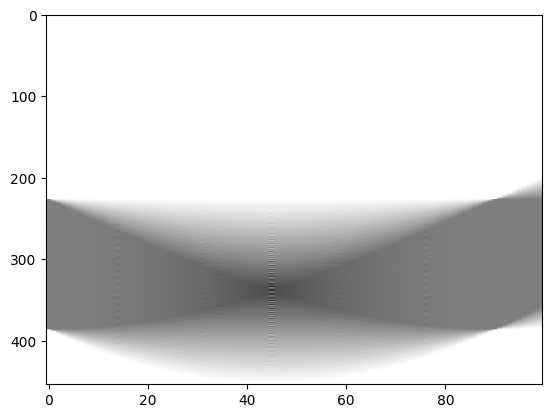

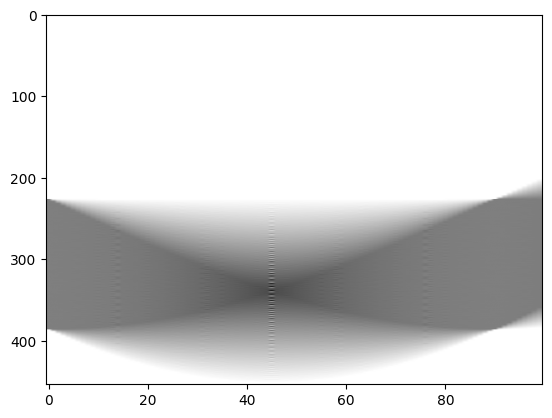

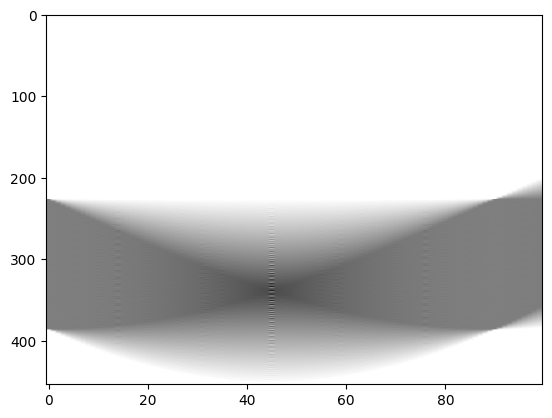

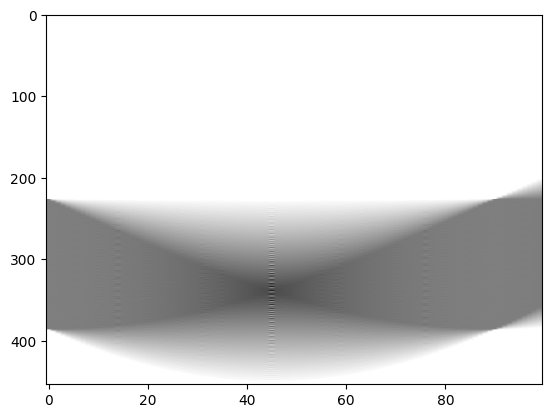

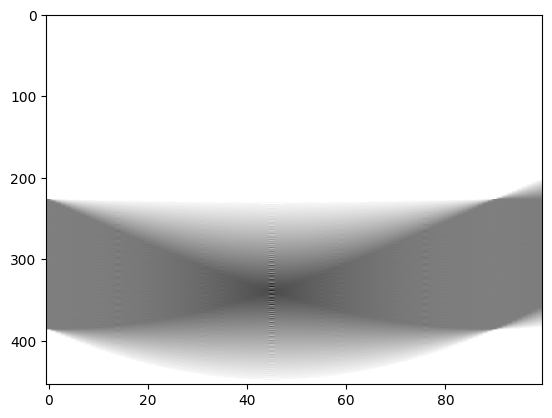

In [16]:
truc = '31260198 [MConverter.eu].ppm'
image0 = cv2.imread(truc)
imagetruc = np.array(image0)

# rgb vers gris
if imagetruc.ndim == 3 and imagetruc.shape[2] == 3:
    imagetruc = np.mean(imagetruc, axis=2)

theta = np.arange(0, 100) * (np.pi / 180)
rhomaxnonentier = np.sqrt(imagetruc.shape[0]**2 + imagetruc.shape[1]**2)
rhomaxentier = int(np.ceil(rhomaxnonentier))
matrice = np.zeros((2 * rhomaxentier, len(theta)))

indicesX, indicesY = [], []
for i in range(imagetruc.shape[0]):           
    for j in range(imagetruc.shape[1]):     
        if imagetruc[i, j] != 0:         
            indicesX.append(j)           
            indicesY.append(i)

indicesX = np.array(indicesX)
indicesY = np.array(indicesY)

for i in range(len(indicesX)):
    x, y = indicesX[i], indicesY[i]
    for j in range(len(theta)):
        rho = int(round(x * np.cos(theta[j]) + y * np.sin(theta[j]))) + rhomaxentier
        if 0 <= rho < 2 * rhomaxentier:  
            matrice[rho, j] += 1

seuils = [2, 4, 5, 6, 10]
for seuil in seuils: 
    matricetest = matrice.copy()
    for i in range(matricetest.shape[0]):
        for j in range(matricetest.shape[1]):
            if matricetest[i, j] < seuil:
                matricetest[i, j] = 0
    
    plt.imshow(matricetest, cmap='binary', aspect='auto')
    plt.show()


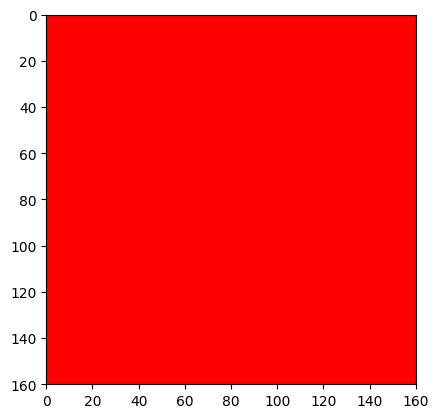

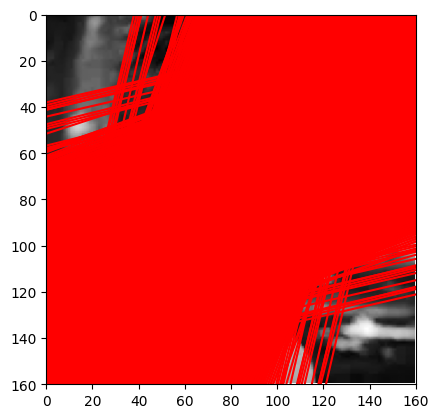

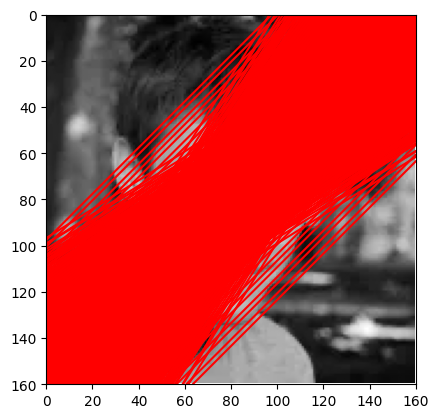

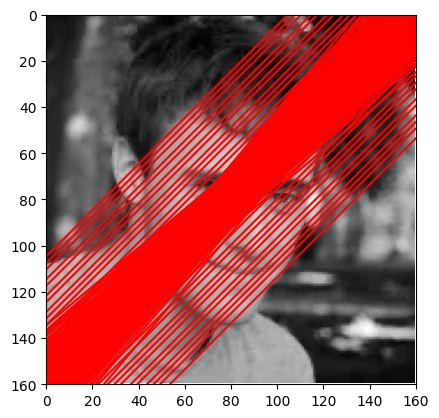

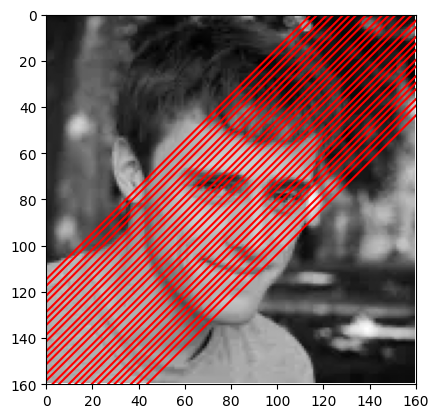

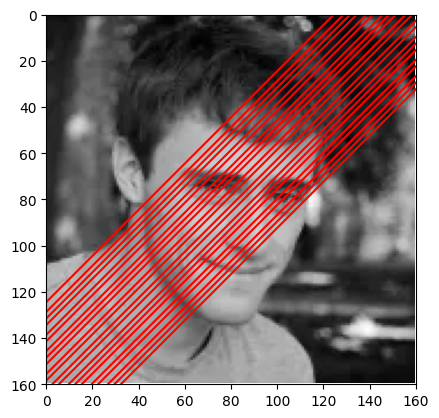

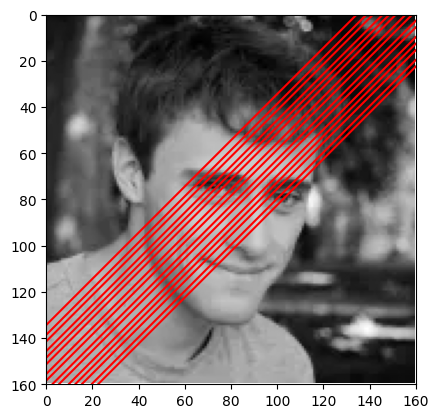

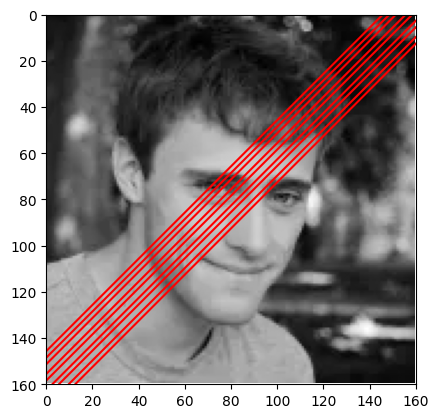

In [17]:
seuils = np.arange(150,300,20)
for seuil in seuils : 

    droites = []
    for i in range(matricetest.shape[0]):  # i = rho
        for j in range(matricetest.shape[1]):  # j = theta
            if matricetest[i, j] >= seuil:
                rhoreel = i - rhomaxentier
                thetareel = theta[j]
                droites.append((rhoreel, thetareel))
    
    plt.imshow(imagetruc, cmap='gray')
    
    for rho, t in droites:
        if np.sin(t) != 0:
            x0 = 0
            x1 = imagetruc.shape[1]
            y0 = (rho - x0 * np.cos(t)) / np.sin(t)
            y1 = (rho - x1 * np.cos(t)) / np.sin(t)
            plt.plot([x0, x1], [y0, y1], 'r-')
        else:
            y0 = 0
            y1 = imagetruc.shape[0]
            x0 = (rho - y0 * np.sin(t)) / np.cos(t)
            x1 = (rho - y1 * np.sin(t)) / np.cos(t)
            plt.plot([x0, x1], [y0, y1], 'r-')
    
    plt.xlim(0, imagetruc.shape[1])
    plt.ylim(imagetruc.shape[0], 0)
    plt.show()